In [26]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
N = 2500; # neurons
g = tf.placeholder(shape=(), dtype=tf.float32);
m = tf.placeholder(shape=(N,1), dtype=tf.float32);
n = tf.placeholder(shape=(N,1), dtype=tf.float32);
I_B = tf.placeholder(shape=(N,1), dtype=tf.float32);


In [28]:
X = np.random.normal(0,1/np.sqrt(N), (N,N));
P = tf.matmul(m,tf.transpose(n)) / N;
J = g*X + P;

x0 = np.random.normal(0,1,(N,1));
x0 = tf.constant(x0, dtype=tf.float32);

I_A = n;
npts = 100;

def sim_RNN(J, I, x0, npts):
    x = x0;
    dt = 0.1;
    rs = [];
    for i in range(npts):
        r = tf.tanh(x);
        rs.append(r);
        xdot = -x + tf.matmul(J, r) + I;
        x = x+dt*xdot;
    return r, tf.stack(rs, axis=0)[:,:,0];

w = m;
out_A, outs_A = sim_RNN(J, I_A, x0, npts);
out_B, outs_B = sim_RNN(J, I_B, x0, npts);

z_A = tf.matmul(outs_A, w) / N;
z_B = tf.matmul(outs_B, w) / N;

sess = tf.Session();
sess.run(tf.global_variables_initializer());

-196.48426247341072


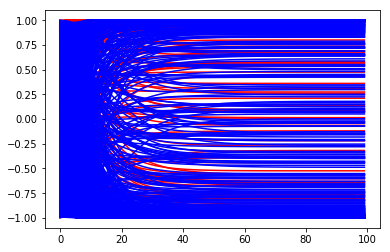

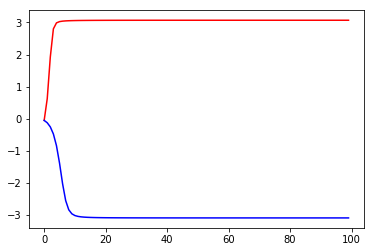

In [38]:

_g = 1.0;
Mm = 3.0;
Mn = 4.0;
Sim = 2.0;
Sin = 2.0;
_m = np.random.normal(Mm,Sim,(N,1));
_n = np.random.normal(Mn,Sin,(N,1));
_I_B = np.random.normal(0.0,1.0,(N,1));

print(np.dot(_n[:,0], _I_B[:,0]));

feed_dict = {m:_m, n:_n, g:_g, I_B:_I_B};

_outs_A, _outs_B, _z_A, _z_B = sess.run([outs_A, outs_B, z_A, z_B], feed_dict);

plt.plot(_outs_A, 'r');
plt.plot(_outs_B, 'b');
plt.show();

plt.plot(_z_A, 'r');
plt.plot(_z_B, 'b');
plt.show();